# **TFG**  

***USE OF ML AND SNOMED CT ENCODED HEALTH PROBLEMS TO PREDICT HOSPITAL DISCHARGE DIAGNOSES***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

%matplotlib inline

## **Data importation**

In [2]:
# Load administration file
data = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/merged_sample_df_3.csv')
data

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
0,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia renal crÓnica reagudizada,2.364330e+08,PRESN_SIS,...,UND,A02BC01,5.1383,440.0,Major,Moderate,11.0,S,Z95.0,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
1,70334597,1,85,81-100,504925,25 days 12:32:44,5.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,J01DH03,0.5189,463.0,Moderate,Moderate,11.0,S,Z95.4,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
2,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia renal crÓnica reagudizada,2.364330e+08,PULSIOX,...,UND,A02BC02,5.1383,440.0,Major,Moderate,11.0,S,Z99.2,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
3,70453235,1,74,66-80,220777,83 days 01:15:29,8.0,insuficiencia cardÍaca descompensada,1.951110e+08,PRESN_SIS,...,ML,C03CA01,4.2171,183.0,Major,Major,5.0,S,B96.29,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS
4,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,confusiÓn aguda,1.309870e+08,PULSIOX,...,ML,C03CA01,5.1383,440.0,Major,Moderate,11.0,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945909,25292,2,69,66-80,229159,15 days 01:57:17,4.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,R03AL02,1.9037,120.0,Moderate,Minor,4.0,S,Z53.32,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
945910,70400286,1,69,66-80,367139,28 days 01:00:48,11.0,cardiopatÍa isquÉmica crÓnica,4.138380e+08,PRESN_SIS,...,ML,B05BA03,5.8134,179.0,Extreme,Extreme,5.0,S,I25.2,ENFERMEDADES DEL SISTEMA CIRCULATORIO
945911,70073978,1,76,66-80,365027,5 days 15:52:30,7.0,trastorno febril,4.161130e+08,PULSIOX,...,ML,N02BE01,0.4202,249.0,Minor,Minor,6.0,S,Z85.118,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
945912,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia cardÍaca descompensada,1.951110e+08,PRESN_SIS,...,UND,C07AB07,5.1383,440.0,Major,Moderate,11.0,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [3]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

# Print duplicates if they exist
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [4]:
# Check for missing values
missing_values = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': data.isnull().mean() * 100})

display(missing_values)

,Missing Count,Missing Percentage
nhc,0,0.0
sex_atr,0,0.0
age,0,0.0
age_group,0,0.0
episode_ref,0,0.0
episode_duration,0,0.0
num_health_issues,0,0.0
snomed_descr,0,0.0
snomed_code,0,0.0
rc_sap_ref,0,0.0


In [5]:
# Statistical summary for numerical data
numerical_data = data.select_dtypes(include=['number'])
numerical_summary = numerical_data.describe()
numerical_summary

,nhc,sex_atr,age,episode_ref,num_health_issues,snomed_code,clinical_records_result_num_mean,lab_result_num_mean,adm_drug_dose_mean,prescription_drug_dose_mean,drg_weight,drg_ref,mdc_ref
count,9.459140e+05,945914.000000,945914.000000,9.459140e+05,945914.00000,9.459140e+05,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000
mean,3.069518e+07,1.413372,67.791088,4.252348e+05,6.06921,2.974589e+08,93.712684,136.390233,88.441617,106.751012,4.117290,284.331714,8.526513
std,3.333042e+07,0.492439,11.780635,2.126922e+05,2.99168,3.685475e+08,24.011460,3.279198,179.230403,193.050797,3.814039,209.599237,4.729402
min,1.139300e+04,1.000000,16.000000,2.860000e+02,1.00000,3.550010e+05,48.125000,129.000000,0.010000,0.000000,0.290600,1.000000,1.000000
25%,4.591553e+06,1.000000,62.000000,2.938730e+05,3.00000,6.856600e+07,69.976744,133.727273,1.000000,1.000000,1.791300,174.000000,5.000000
50%,5.422664e+06,1.000000,73.000000,4.404990e+05,6.00000,1.951110e+08,96.333333,135.839506,2.000000,2.000000,2.446000,231.000000,6.000000
75%,7.033460e+07,2.000000,74.000000,5.350470e+05,8.00000,4.046400e+08,109.497462,138.394737,32.164948,100.000000,5.813400,440.000000,11.000000
max,8.007624e+07,2.000000,96.000000,1.154799e+06,13.00000,2.147484e+09,185.000000,147.500000,500.000000,500.000000,17.936300,952.000000,24.000000


In [6]:
# Statistical summary for categorical data
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_summary = categorical_data.describe()
categorical_summary

,age_group,episode_duration,snomed_descr,rc_sap_ref,clinical_records_units,lab_descr,lab_units,adm_route_descr,adm_drug_ref,adm_drug_unit,...,freq_ref,prescription_adm_route_descr,prescription_drug_ref,prescription_drug_unit,prescription_atc_ref,soi_descr,rom_descr,class_ref,icd10_code,icd10_capitulo
count,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,...,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914
unique,6,430,582,3,2,1,2,9,44,3,...,40,7,42,2,36,4,4,3,643,20
top,66-80,56 days 14:45:12,insuficiencia renal aguda,PRESN_SIS,mm Hg,"Sodio, sangre",mEq/L,ORAL,E96F5C461C27EF6FE1000000AC100155,ML,...,C/8H,INTRAVENOSA,3B875C468000801EE1000000AC100155,ML,C03CA01,Major,Extreme,S,Z87.891,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
freq,619235,99740,40260,315671,631326,945914,553390,306079,51875,555116,...,238007,382976,76919,634779,76919,401844,306712,811554,40253,416993


In [7]:
# Value counts of the 'icd10_capitulo' column
data['icd10_capitulo'].value_counts()

icd10_capitulo
FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS                       416993
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                                                    74253
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                                            67284
SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO     53219
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                                         52959
LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS                                         51019
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                                                      47127
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                                                      35630
CAUSAS EXTERNAS DE MORBILIDAD                                                    

## **Encoding Categorical Variables**

In [8]:
print(data.dtypes)

nhc                                   int64
sex_atr                               int64
age                                   int64
age_group                            object
episode_ref                           int64
episode_duration                     object
num_health_issues                   float64
snomed_descr                         object
snomed_code                         float64
rc_sap_ref                           object
clinical_records_result_num_mean    float64
clinical_records_units               object
lab_descr                            object
lab_result_num_mean                 float64
lab_units                            object
adm_route_descr                      object
adm_drug_ref                         object
adm_drug_dose_mean                  float64
adm_drug_unit                        object
adm_atc_ref                          object
freq_ref                             object
prescription_adm_route_descr         object
prescription_drug_ref           

In [9]:
# Keep relevant columns
data_filtered = data.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Color' column
data_filtered['age_group_encoded'] = le.fit_transform(data_filtered['age_group'])

In [11]:
# Encode episode_duration variable
# Convert string to timedelta
data_filtered['episode_duration_parsed'] = pd.to_timedelta(data_filtered['episode_duration'])

# Extract total hours
data_filtered['episode_duration_hours'] = data_filtered['episode_duration_parsed'].dt.total_seconds() / 3600  # hours

In [12]:
# Add 'num_health_issues'
data_filtered['num_health_issues'] = data_filtered['num_health_issues'].astype('int64')

In [13]:
# Encode snomed_code variable
data_filtered['snomed_code_encoded'] = le.fit_transform(data_filtered['snomed_code'])

In [14]:
# Encode rc_sap_ref variable
data_filtered['rc_sap_ref_encoded'] = le.fit_transform(data_filtered['rc_sap_ref'])

In [15]:
# Encode clinical_records_units variable
data_filtered['clinical_records_units_encoded'] = le.fit_transform(data_filtered['clinical_records_units'])

In [16]:
# Encode lab_descr variable
data_filtered['lab_descr_encoded'] = le.fit_transform(data_filtered['lab_descr'])

In [17]:
# Encode lab_units variable
data_filtered['lab_units_encoded'] = le.fit_transform(data_filtered['lab_units'])

In [18]:
# Encode adm_route_descr variable
data_filtered['adm_route_descr_encoded'] = le.fit_transform(data_filtered['adm_route_descr'])

In [19]:
# Encode adm_drug_ref variable
data_filtered['adm_drug_ref_encoded'] = le.fit_transform(data_filtered['adm_drug_ref'])

In [20]:
data_filtered['adm_drug_unit_encoded'] = le.fit_transform(data_filtered['adm_drug_unit'])
data_filtered['adm_atc_ref_encoded'] = le.fit_transform(data_filtered['adm_atc_ref'])
data_filtered['freq_ref_encoded'] = le.fit_transform(data_filtered['freq_ref'])
data_filtered['prescription_adm_route_descr_encoded'] = le.fit_transform(data_filtered['prescription_adm_route_descr'])
data_filtered['prescription_drug_ref_encoded'] = le.fit_transform(data_filtered['prescription_drug_ref'])


In [21]:
data_filtered['prescription_drug_unit_encoded'] = le.fit_transform(data_filtered['prescription_drug_unit'])
data_filtered['prescription_atc_ref_encoded'] = le.fit_transform(data_filtered['prescription_atc_ref'])
data_filtered['drg_ref'] = data_filtered['drg_ref'].astype('int64')
data_filtered['soi_descr_encoded'] = le.fit_transform(data_filtered['soi_descr'])
data_filtered['rom_descr_encoded'] = le.fit_transform(data_filtered['rom_descr'])
data_filtered['mdc_ref'] = data_filtered['mdc_ref'].astype('int64')
data_filtered['class_ref_encoded'] = le.fit_transform(data_filtered['class_ref'])
data_filtered['icd10_capitulo_encoded'] = le.fit_transform(data_filtered['icd10_capitulo'])

In [23]:
data_filtered = data_filtered[['sex_atr', 'age', 'age_group', 'age_group_encoded', 'episode_duration', 'episode_duration_hours', 'num_health_issues',
                   'snomed_code', 'snomed_code_encoded', 'rc_sap_ref', 'rc_sap_ref_encoded',
                   'clinical_records_result_num_mean', 'clinical_records_units', 'clinical_records_units_encoded', 
                   'lab_descr', 'lab_descr_encoded', 'lab_result_num_mean', 'lab_units', 'lab_units_encoded',
                   'adm_route_descr', 'adm_route_descr_encoded', 
                   'adm_drug_ref', 'adm_drug_ref_encoded', 'adm_drug_dose_mean', 
                   'adm_drug_unit', 'adm_drug_unit_encoded', 
                   'adm_atc_ref', 'adm_atc_ref_encoded',
                   'freq_ref', 'freq_ref_encoded', 
                   'prescription_adm_route_descr', 'prescription_adm_route_descr_encoded',
                   'prescription_drug_ref', 'prescription_drug_ref_encoded', 'prescription_drug_dose_mean',
                   'prescription_drug_unit', 'prescription_drug_unit_encoded', 'drg_weight', 'drg_ref',
                   'soi_descr', 'soi_descr_encoded',
                   'rom_descr', 'rom_descr_encoded', 'mdc_ref',
                   'class_ref', 'class_ref_encoded', 
                   'icd10_capitulo', 'icd10_capitulo_encoded']]

In [26]:
data_filtered_2 = data_filtered.copy()

In [27]:
data_filtered_2 = data_filtered_2[['sex_atr', 'age', 'age_group_encoded', 'episode_duration_hours', 'num_health_issues',
                   'snomed_code_encoded', 'rc_sap_ref_encoded',
                   'clinical_records_result_num_mean', 'clinical_records_units_encoded', 
                   'lab_descr_encoded', 'lab_result_num_mean', 'lab_units_encoded',
                   'adm_route_descr_encoded', 
                   'adm_drug_ref_encoded', 'adm_drug_dose_mean', 
                   'adm_drug_unit_encoded', 
                   'adm_atc_ref_encoded',
                   'freq_ref_encoded', 
                   'prescription_adm_route_descr_encoded',
                   'prescription_drug_ref_encoded', 'prescription_drug_dose_mean',
                   'prescription_drug_unit_encoded', 'drg_weight', 'drg_ref',
                   'soi_descr_encoded',
                   'rom_descr_encoded', 'mdc_ref',
                   'class_ref_encoded', 
                   'icd10_capitulo_encoded']]

In [28]:
# Save dataframe
data_filtered.to_csv('data_filtered.csv', index=False)
data_filtered_2.to_csv('data_filtered_2.csv', index=False)

## **Feature selection**

### **Correlation**

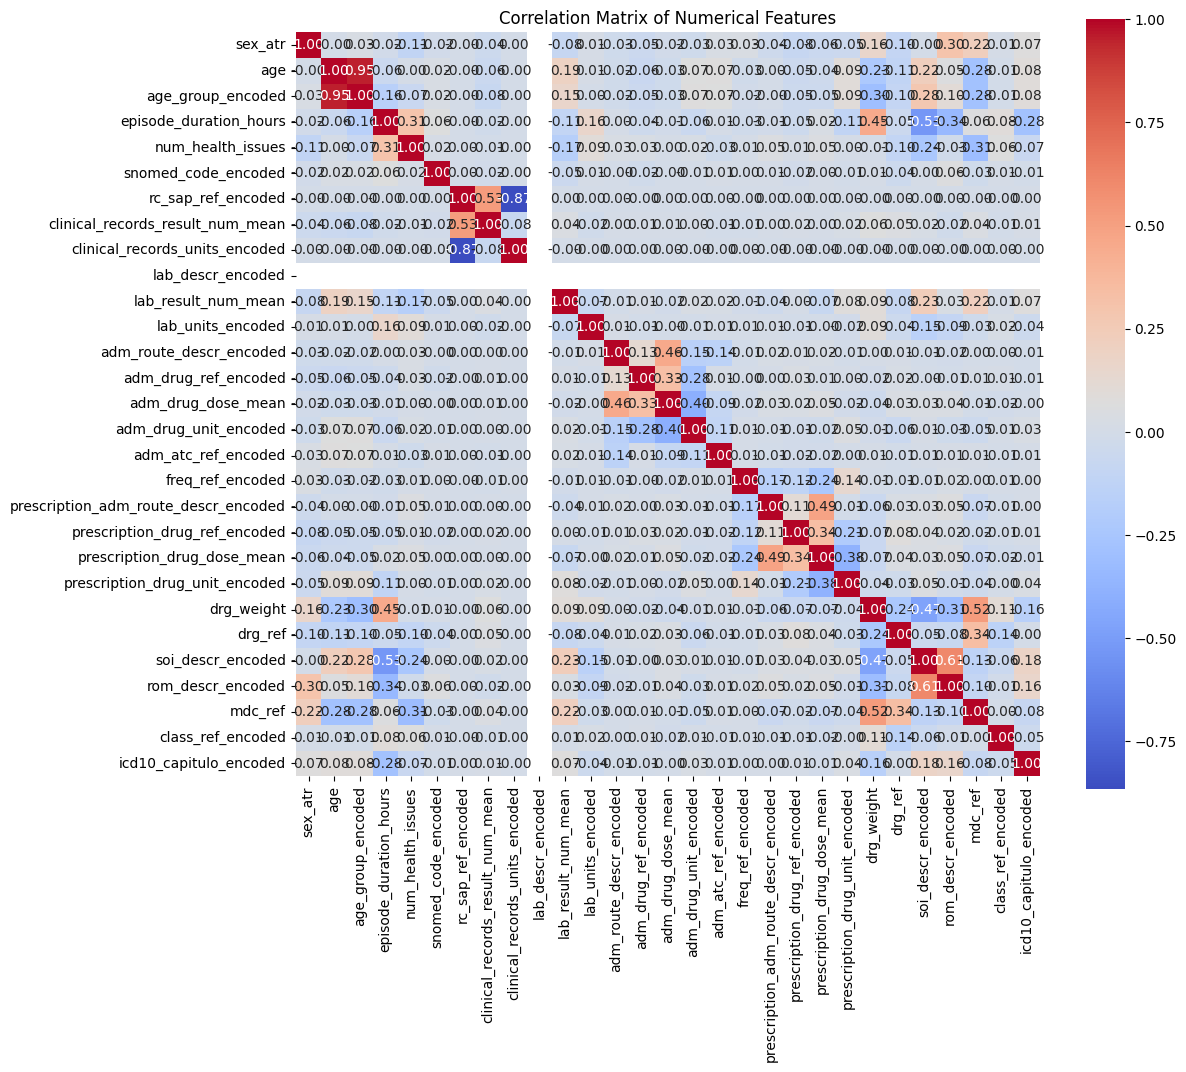

In [36]:
# Correlation Matriz
correlation_matrix_1 = data_filtered_2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_1, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
correlation = correlation_matrix_1.loc['icd10_capitulo_encoded']
sorted_correlation = correlation.sort_values(ascending=False)
sorted_correlation = sorted_correlation.iloc[1:]
display(sorted_correlation)

soi_descr_encoded                       0.179933
rom_descr_encoded                       0.155094
age_group_encoded                       0.082705
age                                     0.082074
sex_atr                                 0.074144
lab_result_num_mean                     0.068340
prescription_drug_unit_encoded          0.037338
adm_drug_unit_encoded                   0.027319
clinical_records_result_num_mean        0.013345
adm_atc_ref_encoded                     0.008608
prescription_drug_ref_encoded           0.006703
freq_ref_encoded                        0.004797
rc_sap_ref_encoded                      0.003065
prescription_adm_route_descr_encoded    0.003062
drg_ref                                 0.001157
clinical_records_units_encoded         -0.002919
adm_drug_dose_mean                     -0.004774
snomed_code_encoded                    -0.005882
adm_drug_ref_encoded                   -0.007264
adm_route_descr_encoded                -0.009929
prescription_drug_do

### **Decision Trees**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Extract features (X) and target (y)
X = data_filtered_2.drop(columns=['icd10_capitulo_encoded'])
y = data_filtered_2['icd10_capitulo_encoded']


# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to show features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
display(feature_importance_df)

                                 Feature  Importance
5                    snomed_code_encoded    0.198396
27                     class_ref_encoded    0.104368
17                      freq_ref_encoded    0.082115
19         prescription_drug_ref_encoded    0.062970
22                            drg_weight    0.050919
3                 episode_duration_hours    0.045826
11                     lab_units_encoded    0.044336
13                  adm_drug_ref_encoded    0.041342
16                   adm_atc_ref_encoded    0.040652
23                               drg_ref    0.035388
20           prescription_drug_dose_mean    0.033257
10                   lab_result_num_mean    0.031500
26                               mdc_ref    0.027088
1                                    age    0.026939
14                    adm_drug_dose_mean    0.023774
4                      num_health_issues    0.023677
25                     rom_descr_encoded    0.019992
7       clinical_records_result_num_mean    0.

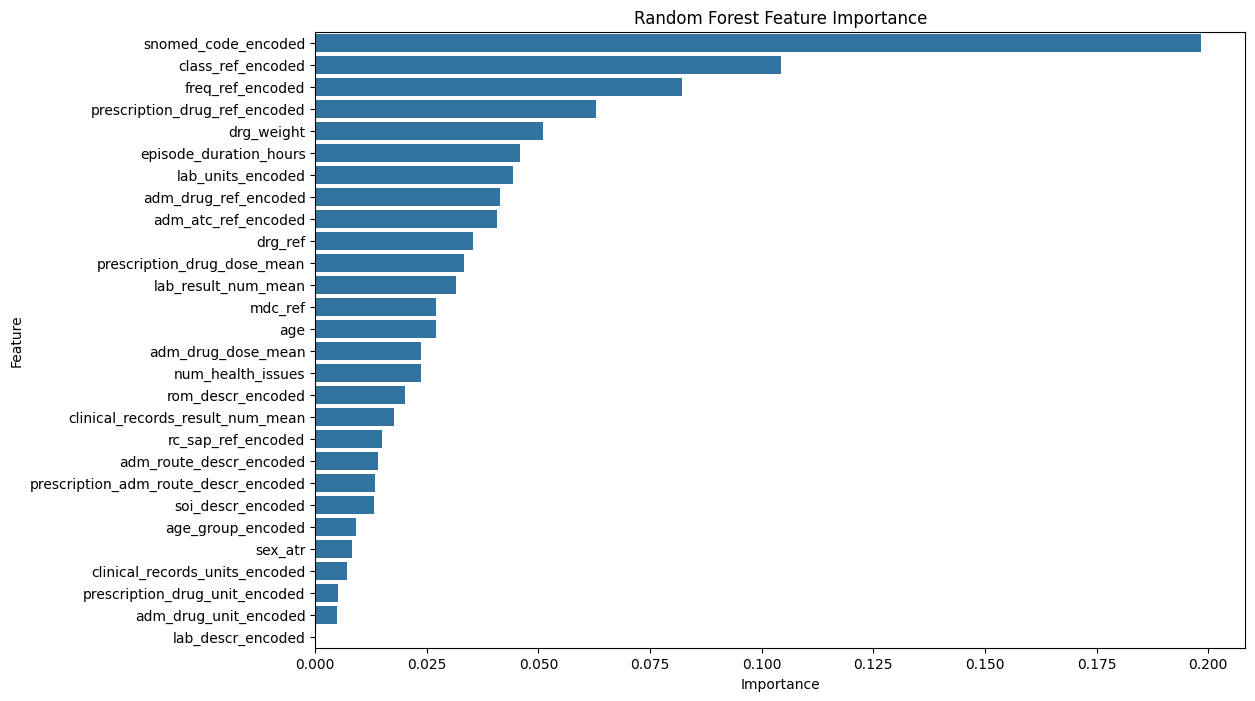

In [47]:
# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Univariate selection**

In [ ]:
# Prepare features and target
X = data_filtered_2.drop(columns=['icd10_capitulo_encoded'])
y = data_filtered_2['icd10_capitulo_encoded']

from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA F-test to each feature
selector = SelectKBest(score_func=f_classif, k='all')  
selector.fit(X, y)

# Create a DataFrame with the features and their corresponding scores
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-statistic': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='ANOVA F-statistic', ascending=False)

# Show the results
display(anova_df)

                                 Feature  ANOVA F-statistic        p-value
27                     class_ref_encoded       24362.384529   0.000000e+00
3                 episode_duration_hours        8418.238459   0.000000e+00
25                     rom_descr_encoded        6795.343331   0.000000e+00
22                            drg_weight        5192.869406   0.000000e+00
24                     soi_descr_encoded        4271.538012   0.000000e+00
26                               mdc_ref        3482.181761   0.000000e+00
23                               drg_ref        3049.708451   0.000000e+00
2                      age_group_encoded        2805.429653   0.000000e+00
4                      num_health_issues        2701.251406   0.000000e+00
10                   lab_result_num_mean        2676.687644   0.000000e+00
0                                sex_atr        2565.024616   0.000000e+00
1                                    age        2474.519126   0.000000e+00
5                    snom

C:\Users\Cindy Chen\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Cindy Chen\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


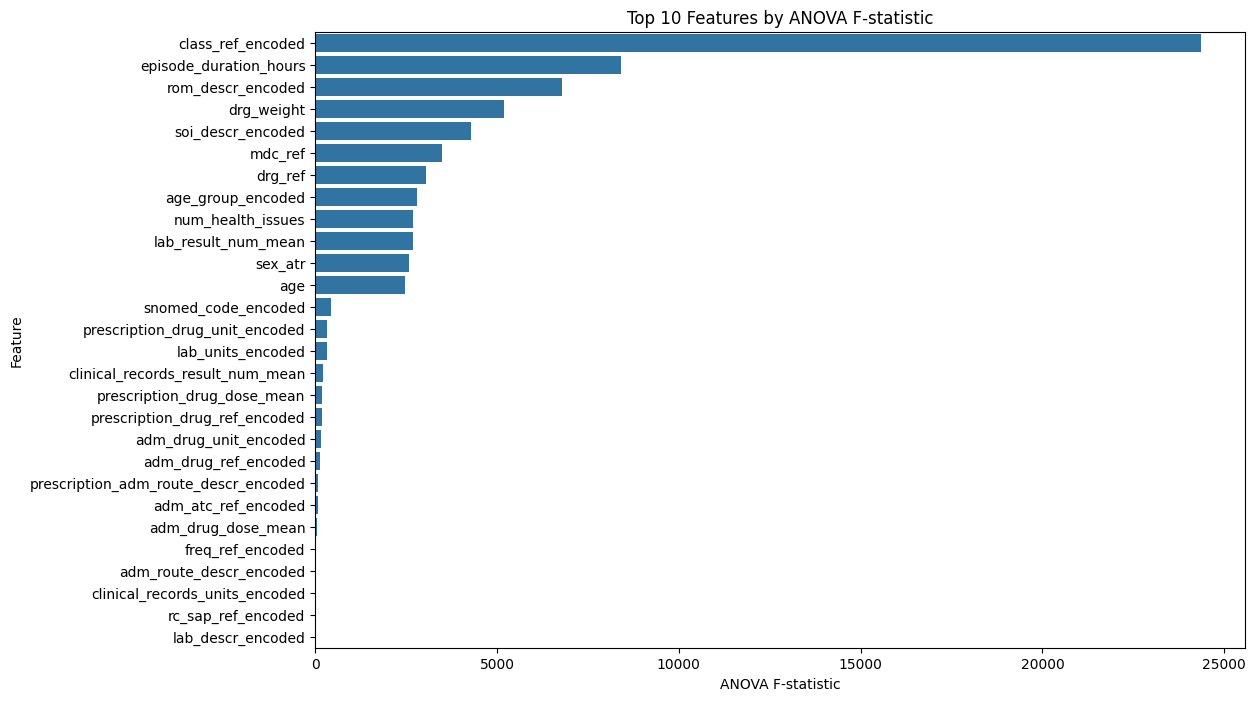

In [ ]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ANOVA F-statistic', y='Feature', data=anova_df)
plt.title('Top 10 Features by ANOVA F-statistic')
plt.xlabel('ANOVA F-statistic')
plt.ylabel('Feature')
plt.show()

## **Subsets**

In [ ]:
# Subset 1: all features
subset_1 = data_filtered_2.copy()

In [ ]:
# Save subset 1
subset_1.to_csv('subset_1.csv', index=False)

In [ ]:
# Subset 2: top 20 features from correlation
subset_2 = X[sorted_correlation.head(20).index.tolist()]

In [59]:
# Save subset 2
subset_2.to_csv('subset_2.csv', index=False)

In [ ]:
# Subset 3: top 10 features from correlation
subset_3 = X[sorted_correlation.head(10).index.tolist()]

In [60]:
# Save subset 3
subset_3.to_csv('subset_3.csv', index=False)

In [ ]:
# Subset 4: top 20 features from random forest
subset_4 = X[feature_importance_df.head(20)['Feature'].tolist()]

In [61]:
# Save subset 4
subset_4.to_csv('subset_4.csv', index=False)

In [ ]:
# Subset 5: top 10 features from random forest
subset_5 = X[feature_importance_df.head(10)['Feature'].tolist()]

In [62]:
# Save subset 5
subset_5.to_csv('subset_5.csv', index=False)

In [56]:
# Subset 6: top 20 features from anova
subset_6 = X[anova_df.head(20)['Feature'].tolist()]

In [63]:
# Save subset 6
subset_6.to_csv('subset_6.csv', index=False)

In [57]:
# Subset 7: top 10 features from anova
subset_7 = X[anova_df.head(10)['Feature'].tolist()]

In [64]:
# Save subset 7
subset_7.to_csv('subset_7.csv', index=False)